In [1]:
import numpy as np
import torch
import torch.nn as nn
import cv2
import os
import matplotlib.pyplot as plt

### Data Exploration

#### OCID

In [2]:
rgb_dataset_path = '../ocid/ARID10_crops/squared_rgb/'
depth_dataset_path = '../ocid/ARID10_crops/surfnorm++/'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


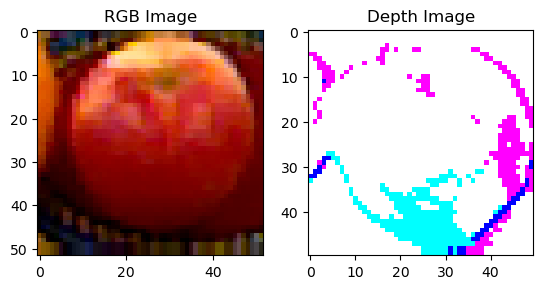

In [3]:
trial_img_name = 'apple/apple_1/04_ARID10tablebottomcurvedseq18_apple_1_4.png'

rgb_img = cv2.cvtColor(cv2.imread(os.path.join(rgb_dataset_path, trial_img_name)), cv2.COLOR_BGR2RGB)
depth_img = cv2.imread(os.path.join(depth_dataset_path, trial_img_name), cv2.IMREAD_UNCHANGED)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title('RGB Image')
plt.subplot(1, 2, 2)
plt.imshow(depth_img)
plt.title('Depth Image')
plt.show()

In [5]:
depth_img.min(), depth_img.max()

(0, 65025)

#### RCFusion

In [14]:
from torchvision.models import resnet18, ResNet18_Weights

In [22]:
resnet18_model = resnet18(weights=ResNet18_Weights.DEFAULT)
resnet18_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  